# Transformando sinal mono em Estério com efeito de rotação em python e resolução aumentada
## - Arthur Carlos de Faria 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.fft import fft
#conda install -c conda-forge librosa
import librosa
import librosa.display as ld
from IPython.display import Audio
import scipy.io.wavfile as wav

## Importando audio de exemplo

In [ ]:
#### Importando o áudio original ####
#coloque o audio na mesma pasta do arquivo e rode o código abaixo
file_name="SUPER_MARIO2.wav"

fs,signal=wav.read(file_name)

length = signal.shape[0] / fs
print(f"length = {length}s")
  
print("Frequência de amostragem do audio: ",fs)
print(signal)
plt.figure(figsize=(20,2))
plt.title("Sinal de audio wav")
plt.xlabel("Amostras")
plt.ylabel("X(t)")
plt.plot(signal)
plt.show()

plt.show()
Audio(file_name)

### Análise no domínio do tempo

In [ ]:
#### Comparando os sinais direito e esquerdo, no domínio de Amostras ####

# time = np.linspace(0., length, signal.shape[0])
signal1= signal[:, 0]
signal2= signal[:, 1]
plt.figure(figsize=(20,2))
plt.title("Sinal Esquerdo")
plt.xlabel("Amostras")
plt.ylabel("X(t)")
plt.plot(signal1)
plt.show()
plt.figure(figsize=(20,2))
plt.title("Sinal direito")
plt.xlabel("Amostras")
plt.ylabel("X(t)")
plt.plot(signal2)


cont=0;
for k in np.arange(0,len(signal1)-1,1):
    if(signal1[k]==signal2[k]):
        cont+=1;
        
print("Porcentagem de pontos iguais",100*cont//len(signal2),"%")


In [ ]:
#### Transformando o eixo X do domínio de amostras para Tempo em Segundos ####

N=len(signal1)
T=1/fs
t=np.arange(0,N*T,T)
plt.figure(figsize=(20,2))
plt.title("Sinal Esquerdo")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,signal1)
plt.show()
plt.figure(figsize=(20,2))
plt.title("Sinal direito")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,signal2)
plt.show()


### Análise no domínio da frequência

In [ ]:
#### Fazendo a FFT dos sinais Esquerdo e Direito ####

fftsignal1=fft(signal1)/len(signal1)
fftsignal2=fft(signal2)/len(signal2)




In [ ]:
#### Plotando e Comparando A FFT dos sinais direito e esquerdo ####

freq=fs*t/(t[len(t)-1])
plt.figure(figsize=(20,2))
plt.title("Sinal Esquerdo")
plt.xlabel("Hz")
plt.ylabel("X1(t)")
plt.plot(freq[:len(freq)//2],np.abs(fftsignal1[:len(freq)//2]))
plt.show()
plt.figure(figsize=(20,2))
plt.title("Sinal direito")
plt.xlabel("Hz")
plt.ylabel("X1(t)")
plt.plot(freq[:len(freq)//2],np.abs(fftsignal2[:len(freq)//2]))
plt.show()




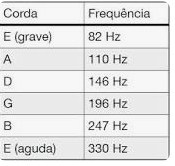

In [ ]:
### Analisando apenas uma Janela para vermos com mais detalhe as principais frequências do sinal ####

plt.figure(figsize=(20,2))
plt.title("Sinal")
plt.xlabel("Hz")
plt.ylabel("X1(t)")
plt.plot(freq[:len(freq)//40],np.abs(fftsignal2[:len(freq)//40]))
plt.grid()
plt.show()


In [ ]:
### Definindo uma função para criar um arquivo de áudio Estereo de 16 bits, somando os lados esquerdo e direito ###

def criarAudio(ladoE,ladoD,nomeArquivo,frequencia):
    
    sinal=np.array(np.zeros((len(ladoE),2)),dtype=np.int16)
    
    for k in np.arange(0,len(ladoE)-1,1):
        sinal[k]=[ladoE[k],ladoD[k]]
        
        
    wav.write(nomeArquivo, frequencia, sinal)  # write to file    
     
 

        

In [ ]:
## Testando função
## Nesta parte nada foi modificado
sinal=criarAudio(signal1,signal2,"TESTE.wav",44100)
Audio("TESTE.wav")

### Tipos de variáveis suportadas
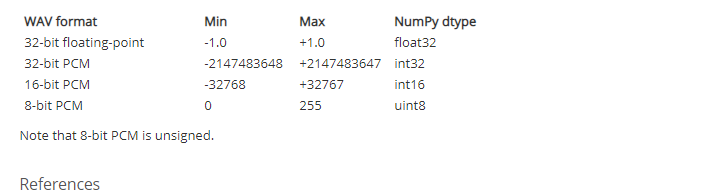

### Projetando os filtros FIR (HP e LP)

In [ ]:
### Projetando o filtro HP com wc=330Hz ###

from  scipy import signal
from  scipy.signal import windows
from numpy import pi
Ap=0.1
Ar=40
Dr=10**(-0.05*Ar)
Dp=(10**(0.05*Ap-1))/(10**(-0.05*Ap+1))
beta=1
numtaps=4501
Delta=min(Dr,20*np.log10(Dp))
wp=(330)*np.pi*2
wr=329*np.pi*2

wc1=np.mean((wr,wp))
FiltroHP=signal.firwin(numtaps,cutoff=wc1,width=(0.1), window='nuttall', pass_zero="highpass",scale=True,nyq=None,fs=fs*np.pi*2)

w,H=signal.freqz(FiltroHP,fs=(1/T))
plt.figure(figsize=(20,5))
plt.ylabel("H(w)")
plt.xlabel("rad/amostras")
plt.plot(FiltroHP)
plt.ylabel("h(t)")
plt.xlabel("amostras")
plt.title("Filtro HP obtido")
plt.show()

plt.figure(figsize=(20,5))
plt.xscale('log')
plt.title("Módulo da resposta em frequência do filtro HP")
plt.plot(w,np.abs(H))
plt.ylabel('|H(w)|')
plt.xlabel('Hz')
plt.show()

plt.figure(figsize=(20,5))
plt.xscale('log')
plt.title("Fase da resposta em frequência do filtro HP")
plt.plot(w,np.angle(H))
plt.ylabel('$<H(w)$')
plt.xlabel('Hz')
plt.show()


plt.figure(figsize=(20,5))
plt.title("Gabarito do filtro")
plt.fill([0,0.5*wr/pi,0.5*wr/pi,0],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([0.5*wp/pi,0.5*wp*15/pi,0.5*wp*15/pi,0.5*wp/pi],[-10,-10,-Ap,-Ap],0.8,c='r')
plt.xlabel('Hz')
plt.ylabel('dB')
plt.plot(w,20*np.log(np.abs(H)))
plt.show()


In [ ]:
### Projetando filtro LP com wc=330Hz ###

Ap=0.1
Ar=40
Dr=10**(-0.05*Ar)
Dp=(10**(0.05*Ap-1))/(10**(-0.05*Ap+1))
beta=1
numtaps=5501
Delta=min(Dr,20*np.log10(Dp))
wp=(330)*np.pi*2
wr=340*np.pi*2

wc1=np.mean((wr,wp))
FiltroLP=signal.firwin(numtaps,cutoff=wc1,width=(0.1), window='nuttall', pass_zero="lowpass",scale=True,nyq=None,fs=fs*np.pi*2)

w,H=signal.freqz(FiltroLP,fs=(1/T))
plt.figure(figsize=(20,5))
plt.ylabel("H(w)")
plt.xlabel("rad/amostras")
plt.plot(FiltroLP)
plt.ylabel("h(t)")
plt.xlabel("amostras")
plt.title("Filtro LP obtido")
plt.show()

plt.figure(figsize=(20,5))
plt.xscale('symlog')
plt.grid()
plt.title("Módulo da resposta em frequência do filtro LP")
plt.plot(w,np.abs(H))
plt.ylabel('|H(w)|')
plt.xlabel('Hz')
plt.show()

plt.figure(figsize=(20,5))
plt.xscale('symlog')
plt.grid()
plt.title("Fase da resposta em frequência do filtro LP")
plt.plot(w,np.angle(H))
plt.ylabel('$<H(w)$')
plt.xlabel('Hz')
plt.show()

plt.figure(figsize=(20,5))
plt.title("Gabarito do filtro")
plt.xlabel('Hz')
plt.ylabel('dB')
plt.fill([0,0.5*wr/pi,0.5*wr/pi,0],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([0.5*wp/pi,0.5*wp*15/pi,0.5*wp*15/pi,0.5*wp/pi],[-10,-10,-Ap,-Ap],0.8,c='r')
plt.plot(w,20*np.log(np.abs(H)))
plt.show()

### Aplicando os filtros projetados Ao sinal áudio

In [ ]:
### aplicando filtro HP para separar o agudo e filtro LP para separar o grave
agudo=signal.convolve(signal1,FiltroHP)
grave=signal.convolve(signal1,FiltroLP)


In [ ]:
### Comparação dos sinais separados com o sinal original, no domíno do tempo ###

plt.figure(figsize=(20,5))
plt.title("Sinal Agudo filtrado no domínio do tempo")
plt.plot(t,signal1)
plt.plot(t,agudo[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal Grave filtrado no domínio do tempo")
plt.plot(t,signal1)
plt.plot(t,grave[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()



In [ ]:
### Comparação dos sinais separados com o sinal original, no domíno da frequência ###

fftagudo=fft(agudo)/len(agudo)
fftgrave=fft(grave)/len(grave)

plt.figure(figsize=(20,2))
plt.title("Sinal Esquerdo")
plt.xlabel("Hz")
plt.ylabel("X1(t)")
plt.plot(freq[:len(freq)//2],np.abs(fftsignal1[:len(freq)//2]))
plt.plot(freq[:len(freq)//2],np.abs(fftagudo[:len(freq)//2]))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.xscale('log')
plt.show()

plt.figure(figsize=(20,2))
plt.title("Sinal direito")
plt.xlabel("Hz")
plt.ylabel("X1(t)")
plt.plot(freq[:len(freq)//2],np.abs(fftsignal1[:len(freq)//2]))
plt.plot(freq[:len(freq)//2],np.abs(fftgrave[:len(freq)//2]))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.xscale('log')
plt.show()

In [ ]:
### Escrevendo o sinal de áudio contendo somente frequencias agudas ###
wav.write("agudo.wav", 44100, np.array(agudo,dtype=np.int16))
Audio("agudo.wav")


In [ ]:
### Escrevendo o sinal de áudio contendo somente frequencias graves ###
wav.write("grave.wav", 44100, np.array(grave,dtype=np.int16))
Audio("grave.wav")

In [ ]:
### Amplificando as frequencias graves em específico, pois no audio que escolhemos o grave estava bem suavizado ###

wav.write("grave.wav", 44100, np.array(3*grave,dtype=np.int16))
Audio("grave.wav")
grave=3*grave

### Criando o efeito de Rotação

In [ ]:
### Colocando os sinais grave e agudo para oscilarem entre os lados esquerdo e direito, com um período de oscilação de 10 segundos ###

T=20
amplitudeGraveEsquerdo=(np.cos(2*np.pi*t/T))**2
amplitudeGraveDireito=(np.sin(2*np.pi*t/T))**2

amplitudeAgudoEsquerdo=(np.sin(2*np.pi*t/T))**2
amplitudeAgudoDireito=(np.cos(2*np.pi*t/T))**2

soma=amplitudeGraveEsquerdo+amplitudeGraveDireito
plt.figure(figsize=(20,2))
plt.title("Amplitude do sinal grave")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,amplitudeGraveEsquerdo)
plt.plot(t,amplitudeGraveDireito)
plt.plot(t,soma)
plt.legend(("Esquerdo","Direito","Esquerdo+Direito"))
amplitudeGraveEsquerdo=(np.cos(2*np.pi*t/T))**2
amplitudeGraveDireito=(np.sin(2*np.pi*t/T))**2
soma=amplitudeGraveEsquerdo+amplitudeGraveDireito
plt.figure(figsize=(20,2))
plt.title("Amplitude do sinal agudo")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,amplitudeAgudoEsquerdo)
plt.plot(t,amplitudeAgudoDireito)
plt.plot(t,soma)
plt.legend(("Esquerdo","Direito","Esquerdo+Direito"))



In [ ]:
### Visão Geral de como se comportam nossos audios esquerdo e direito após aplicar rotação ###
agudoEsquerdo=amplitudeAgudoEsquerdo*agudo[:len(amplitudeAgudoEsquerdo)]
graveEsquerdo=amplitudeGraveEsquerdo*grave[:len(amplitudeGraveEsquerdo)]

agudoDireito=amplitudeAgudoDireito*agudo[:len(amplitudeAgudoDireito)]
graveDireito=amplitudeGraveDireito*grave[:len(amplitudeGraveDireito)]

plt.figure(figsize=(20,2))
plt.title("Esquerdo")
plt.xlabel("Segundos")
plt.ylabel("X(t)")
plt.plot(t,agudoEsquerdo)
plt.plot(t,graveEsquerdo)
plt.legend(("Agudo","Grave","Agudo+grave"))
amplitudeGraveEsquerdo=(np.cos(2*np.pi*t/T))**2
amplitudeGraveDireito=(np.sin(2*np.pi*t/T))**2
soma=amplitudeGraveEsquerdo+amplitudeGraveDireito

plt.figure(figsize=(20,2))
plt.title("Direito")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,agudoDireito)
plt.plot(t,graveDireito)
plt.legend(("Agudo","Grave","Agudo+grave"))



In [ ]:
### Somando as componentes esquerda e direita, para comparar com o audio original ###

Esquerdo=agudoEsquerdo+graveEsquerdo
Direito=agudoDireito+graveDireito
plt.figure(figsize=(20,2))
plt.title("Sinal original")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,Esquerdo+Direito)
plt.plot(t,signal1)
plt.legend(("Modificado","Original"))

### Nota-se que o audio mantem exatamente a mesma forma, porém com as componentes graves agora amplificadas ###


In [ ]:
### Escrevendo o audio direito, para testar a oscilação entre agudo e grave ###
wav.write("DireitoF.wav", 44100, np.array(Direito,dtype=np.int16))
Audio("DireitoF.wav")

In [ ]:
### Escrevendo o audio direito, para testar a oscilação entre agudo e grave ###
wav.write("EsquerdoF.wav", 44100, np.array(Direito,dtype=np.int16))
Audio("EsquerdoF.wav")

In [ ]:
### Juntando Os lados Esquerdo e direito num audio ESTEREO com rotação ###

sinal=criarAudio(Esquerdo,Direito,"sinalComRotacao.wav",44100)
Audio("sinalComRotacao.wav")
## Como o audio grave e o agudo trocam de lado simultaneamente como descrito na senoide acima, cria-se um efeito 
## que da a sensação de que está girando

### Aumentando a resolução do audio

In [ ]:
#### Usando Reamostragem e Interpolação para melhorar a qualidade(resolução) do áudio no eixo X ####  


L=5
M=1
FS=44100*L/M
T=1/FS
tr=np.arange(0,len(t)*L*T/M,T)
print("Nova frequência de amostragem:",FS,"Hz")
print("Azul: Sinal original")
print("Amarelo: sinal reamostrado por fator não inteiro")

EsquerdoR=signal.resample_poly(Esquerdo,L,M)
DireitoR  =signal.resample_poly(Direito,L,M)


plt.figure(figsize=(20,2))
plt.title("Esquerdo")
plt.xlabel("Segundos")
plt.ylabel("X(t)")
plt.plot(t,Esquerdo)
plt.plot(tr,EsquerdoR)
plt.title("Reamostragem do sinal Esquerdo")
amplitudeGraveEsquerdo=(np.cos(2*np.pi*t/T))**2
amplitudeGraveDireito=(np.sin(2*np.pi*t/T))**2
soma=amplitudeGraveEsquerdo+amplitudeGraveDireito
plt.legend(("Antes","Depois"))
plt.figure(figsize=(20,2))
plt.title("Reamostragem do sinal direito")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t,Direito)
plt.plot(tr,DireitoR)
plt.legend(("Antes","Depois"))
# A resolução foi aumentada 5 vezes

In [ ]:
### Analisando apenas uma Janela para vermos com mais detalhes os efeitos de aumentarmos a resolução ####

k=200000
plt.figure(figsize=(20,2))
plt.title("Reamostragem do sinal Esquerdo")
plt.xlabel("Segundos")
plt.ylabel("X(t)")
plt.plot(t[:len(t)//k],Esquerdo[:len(t)//k])
plt.plot(tr[:len(tr)//k],EsquerdoR[:len(tr)//k])
plt.legend(("Antes","Depois"))
amplitudeGraveEsquerdo=(np.cos(2*np.pi*t/T))**2
amplitudeGraveDireito=(np.sin(2*np.pi*t/T))**2
soma=amplitudeGraveEsquerdo+amplitudeGraveDireito

plt.figure(figsize=(20,2))
plt.title("Reamostragem do sinal direito")
plt.xlabel("segundos")
plt.ylabel("X(t)")
plt.plot(t[:len(t)//k],Direito[:len(t)//k])
plt.plot(tr[:len(tr)//k],DireitoR[:len(tr)//k])
plt.legend(("Antes","Depois"))
plt.show()

In [ ]:
#### Criando função para Aumentar a Qualidade no eixo Y, aumentando o numero de bits de gravação ####

def criarAudio32(ladoE,ladoD,nomeArquivo,frequencia):
    ganho=2147483647/32767
    sinal=np.array(np.zeros((len(ladoE),2)),dtype=np.int32)
    
    for k in np.arange(0,len(ladoE)-1,1):
        sinal[k]=[ganho*ladoE[k],ganho*ladoD[k]]
        
        
    wav.write(nomeArquivo, frequencia, sinal)  # write to file    
     
 

        

### Tipos de variáveis suportadas
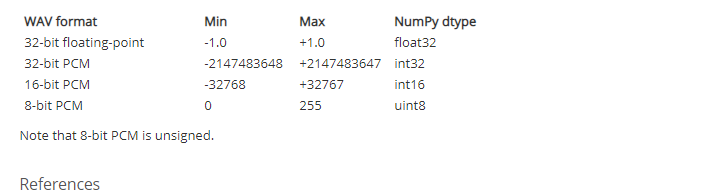

In [ ]:
ganho=2147483647/32767
wav.write("EsquerdoR.wav", 220500, np.array(ganho*EsquerdoR,dtype=np.int32))
Audio("EsquerdoR.wav")

In [ ]:

wav.write("DireitoR.wav", 220500, np.array(ganho*DireitoR,dtype=np.int32))
Audio("DireitoR.wav")

In [ ]:
sinal=criarAudio(EsquerdoR,DireitoR,"AudioFinal.wav",220500)
Audio("AudioFinal.wav")

### Enfim temos nosso áudio final: Estéreo, com ganho nas frequencias graves, resolução aumentada e efeito de rotação entre os lados.